### Libraries

In [59]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.feature_selection import SelectKBest, chi2, f_regression
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler, PolynomialFeatures

from sklearn.metrics import mean_squared_error
from sklearn.model_selection import KFold, train_test_split
from sklearn.linear_model import Ridge, Lasso, LinearRegression

In [60]:
path_ = "c:/Users/Paul/Desktop/MSc DSBA/1. Big Data Analytics/1. Project/Github/Cleaned Data/"

### Loading data

In [61]:
df = pd.read_csv(path_+'featured_daily_data.csv')

In [62]:
df.head()

,year,month,day,year.1,index,max_temp,min_temp,wind_speed,wind_temp,rain,...,wkday_cos,sunrise_sin,sunrise_cos,sunset_sin,sunset_cos,mnth_sin,mnth_cos,light,missing_rain,mean_rain
0,2010,9,15,2010,2010-09-15,29.0,17.0,2.222222,17.0,0.000000,...,-0.900969,0.965926,0.258819,-1.0,-1.836970e-16,-0.866025,-0.5,13.0,False,7.666667
1,2010,9,16,2010,2010-09-16,31.0,17.0,4.444444,17.0,1.000000,...,-0.900969,0.965926,0.258819,-1.0,-1.836970e-16,-0.866025,-0.5,13.0,False,7.666667
2,2010,9,17,2010,2010-09-17,25.0,18.0,4.166667,18.0,2.000000,...,-0.222521,0.965926,0.258819,-1.0,-1.836970e-16,-0.866025,-0.5,13.0,False,7.666667
3,2010,9,19,2010,2010-09-19,29.0,16.0,1.388889,16.0,7.666667,...,0.623490,0.965926,0.258819,-1.0,-1.836970e-16,-0.866025,-0.5,13.0,True,7.666667
4,2010,9,20,2010,2010-09-20,25.0,16.0,5.000000,16.0,7.666667,...,1.000000,0.965926,0.258819,-1.0,-1.836970e-16,-0.866025,-0.5,13.0,True,7.666667


### Setting index

In [63]:
df['index'] = pd.to_datetime(df['index'])
df = df.set_index('index', drop = True)

In [64]:
data = df

In [65]:
df_targets = data['cnt']

In [66]:
df = data.drop(['cnt', 'registered', 'casual', 'string_date', 'month','year', 'day'], axis = 1)

In [67]:
mm = MinMaxScaler()
df = mm.fit_transform(df)

pf = PolynomialFeatures(degree = 2, interaction_only=True)
df = pf.fit_transform(df)

print(df.shape)
mm_targets = MinMaxScaler()
df_targets = mm_targets.fit_transform(df_targets.values.astype(float).reshape(-1,1))

(2171, 497)


In [68]:
selecting_features = SelectKBest(f_regression, k=200).fit(df, df_targets.reshape(-1,))
#pca = PCA(n_components=300).fit(df)

C:\Users\Paul\Anaconda3\lib\site-packages\sklearn\feature_selection\univariate_selection.py:279: RuntimeWarning: invalid value encountered in true_divide
  corr /= row_norms(X.T)
C:\Users\Paul\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
C:\Users\Paul\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
C:\Users\Paul\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1818: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


In [69]:
df_best = selecting_features.transform(df)
#df_best = pca.transform(df)
#df_best = df

In [70]:
k_fold = KFold(n_splits=10)

In [71]:
scores_ridge = []
scores_lasso = []
scores_ridge_train = []
scores_lasso_train = []
scores_lr = []
scores_lr_train = []


for train_index, test_index in k_fold.split(df_best):
    
    X_train = df_best[train_index, :]
    y_train = df_targets[train_index]
    X_test = df_best[test_index, :]
    y_test = df_targets[test_index]
    
    ridge = Ridge()
    lasso = Lasso()
    lr = LinearRegression()
    
    
    ridge.fit(X_train,y_train)
    lasso.fit(X_train, y_train)
    lr.fit(X_train, y_train)
    
    scores_ridge.append(mean_squared_error(y_test, ridge.predict(X_test)))
    scores_lasso.append(mean_squared_error(y_test, lasso.predict(X_test)))
    scores_lr.append(mean_squared_error(y_test, lr.predict(X_test)))
    scores_ridge_train.append(mean_squared_error(y_train, ridge.predict(X_train)))
    scores_lasso_train.append(mean_squared_error(y_train, lasso.predict(X_train)))
    scores_lr_train.append(mean_squared_error(y_train, lr.predict(X_train)))
    
print('Lasso : {}'.format(np.mean(scores_lasso)))
print('Ridge : {}'.format(np.mean(scores_ridge)))
print('No reg : {}'.format(np.mean(scores_lr)))

Lasso : 0.05444776323828306
Ridge : 0.009617851453102505
No reg : 0.016072767884965127


We can see that with a ridge regression, we get the best results

### Training linear regression without regularization

In [72]:
X_train, X_test, y_train, y_test = train_test_split(df_best, df_targets, test_size = .2)

#### Linear Regression

In [73]:
model = Ridge()
model.fit(X_train, y_train)
training_score = mean_squared_error(y_train, model.predict(X_train))
y_pred_test = model.predict(X_test)
test_score = mean_squared_error(y_test, y_pred_test)
print('Training score {}'.format(training_score))
print('Cross-Validation {}'.format(test_score))

Training score 0.005843474538605133
Cross-Validation 0.00646444943851208


#### Editing prediction values

In [74]:
actual_predictions = mm_targets.inverse_transform(y_pred_test)
actual_values = mm_targets.inverse_transform(y_test)

## We are gonna assume that the minimum and the maximum values that we can predict are those of the actual values 
actual_predictions[actual_predictions<np.min(actual_values)] = np.min(actual_values)
actual_predictions[actual_predictions>np.max(actual_values)] = np.max(actual_values)


actual_error = mean_squared_error(actual_predictions, actual_values)

print("Mean prediction error {}".format(actual_error))

Mean prediction error 1582918.2682740323


This error seems very important: on average a 2000 bikes error.

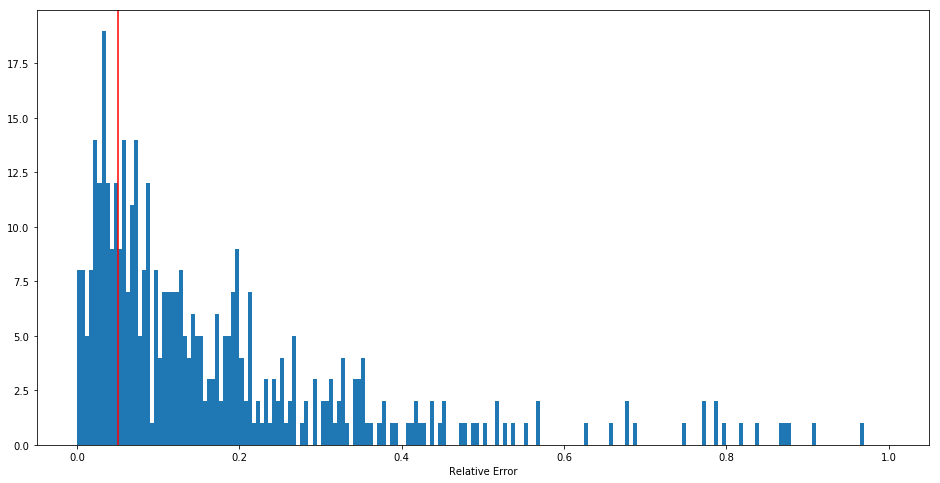

0.257233857188


In [75]:
relative_error = np.abs(np.array(actual_values-actual_predictions)/np.array(actual_values))

plt.figure(figsize = (16,8))
plt.hist(relative_error, bins=200, range=(0, 1))
plt.axvline(.05, color = 'r')
#plt.axvline(-.05, color = 'r')
plt.xlabel("Relative Error")
plt.show()
print(np.mean(relative_error))

In average, we can predict the number of bikes to be used with a 25% margin error
This means that we can predict days of high demand and days of low demand but not with a great precision

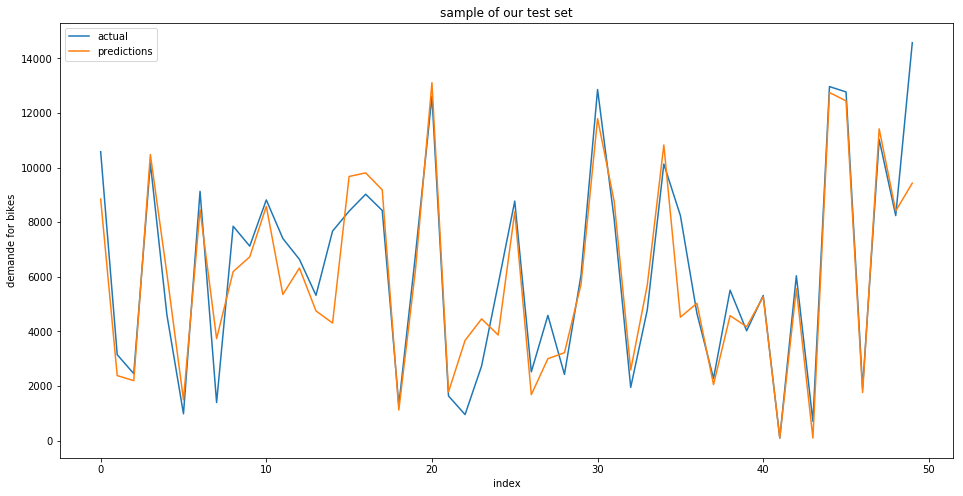

In [76]:
plt.figure(figsize = (16,8))
plt.plot(actual_values[-50:])
plt.plot(actual_predictions[-50:])
plt.legend(['actual', 'predictions'])
plt.title('sample of our test set')
plt.xlabel('index')
plt.ylabel('demande for bikes')
plt.savefig(path_ + 'final_plot.png')
plt.show()